In [104]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,cross_val_score,cross_val_predict,KFold, StratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE,ADASYN,RandomOverSampler,BorderlineSMOTE,SVMSMOTE,SMOTENC
from imblearn.under_sampling import RandomUnderSampler,TomekLinks
from imblearn.combine import SMOTETomek,SMOTEENN
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow import keras
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

In [2]:
configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=configuration)

#### LOAD DATA 

In [148]:
file_path= 'C:/Users/lcast/Desktop/DS/Github/Employee-churn-predtion/Data/Human_Resources.csv'
employee_df=pd.read_csv(file_path)

## 1. DATA DESCRIPTION, DATA STRUCTURE AND INITIAL INTUITIONS

In [96]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### 1.1 Data Description

- Age: Age of the employee.
- Attrition: Target variable. Indicates wether the employee left (1) or stayed (0)
- BusinessTravel: Ferquency of travel. Values: Travel_Rarely', 'Travel_Frequently', 'Non-Travel'
- DailyRate: Daily salary
- Department: Department the employee belong to. Values: 'Sales', 'Research & Development', 'Human Resources'
- DistanceFromHome: Distance from home to the office/working place.
- Education: Level of education. Values: 1'Below College',2'College',3 'Bachelor',4 'Master',5 'Doctor'
- Education Field: field of education. Values: 'Life Sciences', 'Other', 'Medical', 'Marketing','Technical Degree', 'Human Resources'
- EmployeeCount: number of employees in the company.
- EmployeeNumber: internal company employee id.
- Environment Satisfaction: index of satisfaction with the comapny environment. Values: 1 'Low', 2 'Medium',3 'High',4 'Very High'
- Gender: Fema;e/Male
- HourlyRate: Houly salary rate
- JobInvolvement: psychological and emotional extent to which someone participates in his/her work, profession, and company. Values:1 'Low',2 'Medium',3 'High',4 'Very High'
- JobLevel: job level from less level (1) to higher level (5)
- JobRole: job role. Values: 'Sales Executive', 'Research Scientist', 'Laboratory Technician','Manufacturing Director', 'Healthcare Representative', 'Manager','Sales Representative', 'Research Director', 'Human Resources'
- JobSatisfaction: job satisfaction. Values: 1 'Low',2 'Medium',3 'High',4 'Very High'
- MaritalStatus: marital status. Values: 'Single', 'Married', 'Divorced'
- MonthlyIncome: monthly income of the employee.
- MonthlyRate: monthly salary of the employee.
- NumCompaniesWorked:number of companies that the employee has worked.
- Over18: indicates if the employer is older tahn 18 or not.
- OverTime: indicates if the mployee works overtime or not.
- PercentSalaryHike: percentage of salary increase.
- PerformanceRating: performance rating. Values: 1 'Low',2 'Good',3 'Excellent',4 'Outstanding'
- RelationshipSatisfaction: Degree of satisfaction with manager/other employees? values: 1 'Low',2 'Medium',3 'High',4 'Very High'
- StandardHours: number of hours worked.
- StockOptionLevel: option to company stock options as part of the compensation package.
- TotalWorkingYears: number of years worked for the company.
- TrainingTimesLastYear: how many times the employee received training during last year.
- WorkLifeBalance: degree of work-life balance. Values: 1 'Bad',2 'Good',3 'Better',4 'Best'
- YearsAtCompany: number of years working in the company.
- YearsInCurrentRole: number of years in current role.
- YearsSinceLastPromotion: number of years since last promotion.
- YearsWithCurrManager: number of years with current manager.

### 1.2 Data structure


In [5]:
#First rows of the dataset
employee_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [6]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Total of 34 attributes and one target variables. 1470 instances with no missing values. Nine  of the attributes types are object and the remaining numerical. Most of this numerical are actually categorical variables that have been encoded (for example WorkLifeBalance values are 1/2/3/4 for Bad/Good/Better/BEst, respetively).
The attributes   'overtime' , 'Over18' along with the target 'Attritition'are boolean (Y/N) We replace by an integer (N/Y=> 0/1) before performing any visualization.

In [154]:
#employee_df['Attrition']=np.where(employee_df['Attrition']=='Yes',1,0)
employee_df['Attrition']=employee_df['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
employee_df['OverTime']=employee_df['OverTime'].apply(lambda x: 1 if x=='Yes' else 0)
employee_df['Over18']=employee_df['Over18'].apply(lambda x: 1 if x=='Y' else 0)

To get a quick feel of the frequency distribution  we plot an histogram for each numerical attribute:

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'Over18'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
       

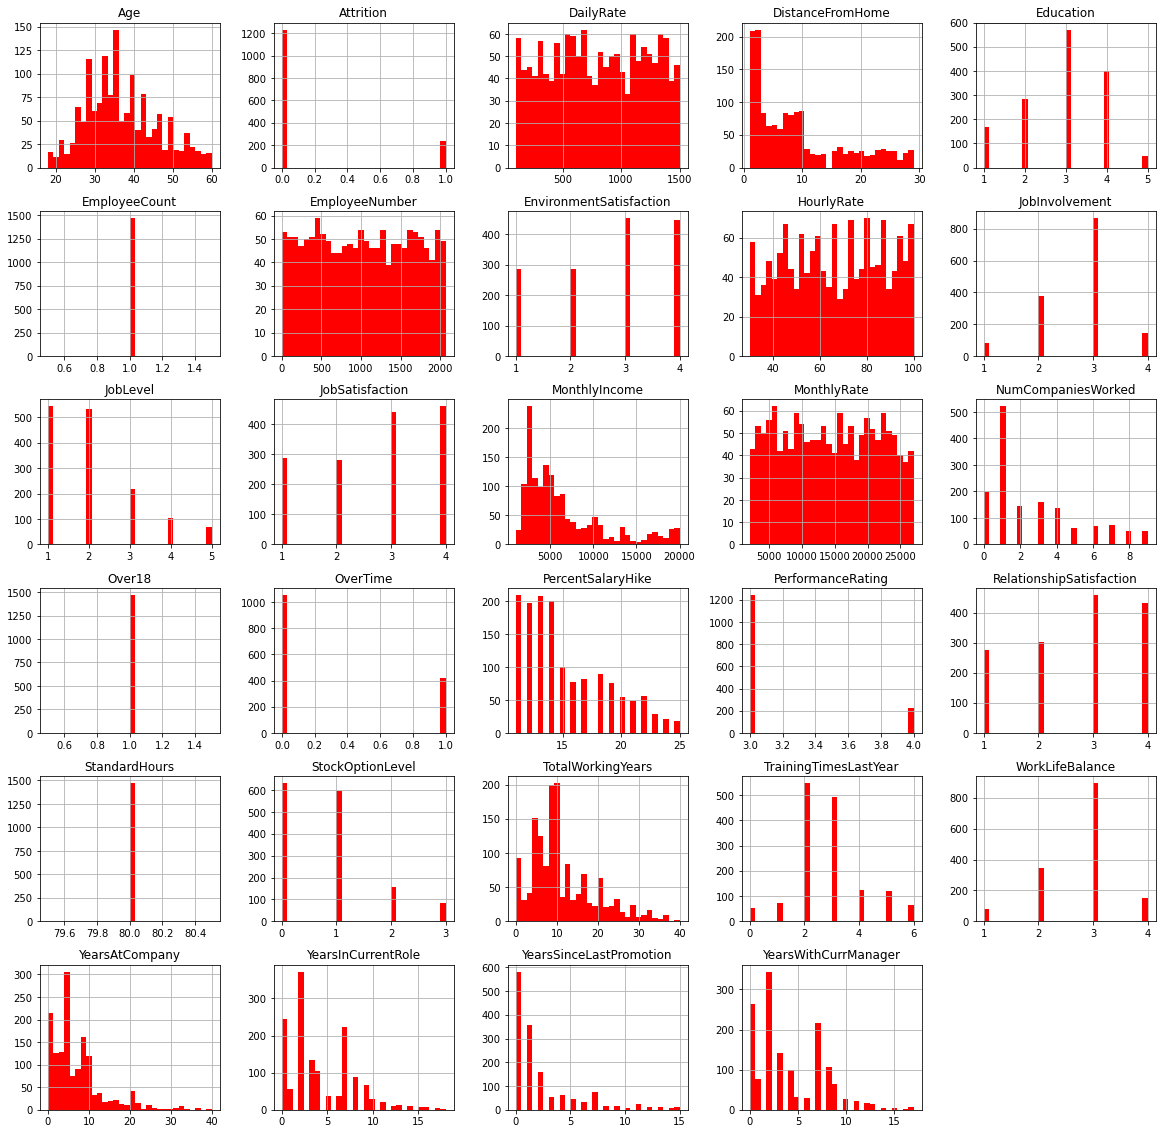

In [8]:
employee_df.hist(bins=30,figsize=(20,20),color='r')

We can draw several observations from the histograms:

- Imbalance dataset:  Around of 85% of the employees in the dataset stayed (attrition=0) and 15% left (attrition=1) left. We might need to explore data balancing methods.
-There are several features that present tailed distributions such as  'DistanceFromHome','MonthlyIncome',TotalWorkingYears' and 'YearsAtCompany'. Depending on the model to be built later, normalization of the data might be required.
- The features 'EmployeeCount', 'Standardhours' and 'Over18'  do not change from one employee to the other, so can be dropped. It  also makes sense to drop 'EmployeeNumber' since is just and employee ID not relevant for the analysis.


In [155]:
#Dropping non relevant features
employee_df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1,inplace=True)

In the dataset there are also three features that seem to be related to the salary rate: hourly rate, daily rate and monthly rate. One would think that all this three features should be strongly correlated (daily rate should be an aggregarion of horly rate and monthly rate an aggregation of the daily rate). However, if we plot a correlation heatmap , we can see that threre is no relation:

<AxesSubplot:>

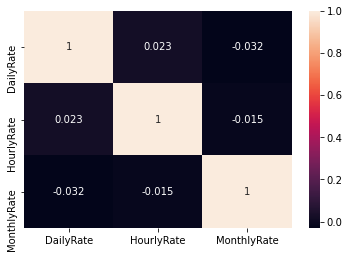

In [10]:
correlations = employee_df[['DailyRate','HourlyRate','MonthlyRate']].corr()
#f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

Since we are not complety sure of what this features represent (in a real situation we would ask to the HR department), and because in the dataset there is the variable Monthly Income that provides information about the salary, we remove all three.

In [156]:
employee_df.drop(['DailyRate','HourlyRate','MonthlyRate'],axis=1,inplace=True)

### 1.3 Initial Intuitions

Before proceding with the analysis itself, we can make some supositions based just on our judgment, and try to identify which variables contribute to reduce the attrition and which ones increase it.

Variables that we expect to reduce the employee attrition:

- 'HourlyRate','DailyRate', 'MonthlyIncome', 'MonthlyRate': for all this salary related variables, we can expect the employees with higher salaries to have a lower rate of attrition.
- 'PercentSalaryHike': those employees that have speculate had a salary increase probably present a lower rate of attrition
- 'TotalWorkingYears': Usually, mobility among employeers less working years who are starting their careers tends to be higher
- 'EnvironmentSatisfaction', 'WorkLifeBalance','JobSatisfaction', 'JobInvolvement','RelationshipSatisfaction': All this variables looks like straighforward. The higher the satisfaction with working conditions, the lesser the reason to leave the company.
- 'PerformanceRating': Seems reasonable to expect that those employees with higher performance rating usually stay ath the company.
- 'JobLevel': Probably more senior workers present a lower rate of attrition. 
- 'StockOptionLevel': Employees with this benefit will tend to stay more in the company.
- 'TrainingTimesLastYear': This variable means that the company is investing in their employees. Possibily employees with more trainings are more satisfied and tend to stay longer. 
- 'YearsAtCompany','YearsInCurrentRole': employees with more years at the company probably will have less rate of attrition. Years in current role can actually go both ways. Longer time in a role could mean that the employee is satisfied with his/her current role. On the other side, could mean that there is no possibility for a promotion.

Variables that we expect to increase the employee attrition:

- 'NumCompaniesWorked': An employeer that has a high number of companies work for means that usually changes his/her job.
- 'DistanceFromHome': The longer distance the worst commute, which might impact the satisfaction, work life balance.
- 'OverTime': No need to comment this one, right?
- 'YearsSinceLastPromotion': longer takes to get a promotion, higher attrition.
- 'BusinessTravel': probably those emmployees that travel more frequently have a higher level of attrition.

We will now split the dataset into training and test subsets. We are doing the split before the EDA and not later (before the model selection) to avoid the data snooping bias: the EDA can influence our decissions so to simulate a real situation, if we consider the testing data as a true unseen data,  we shouldn't be able to analyze the testing data. 

Since the dataset is unbalanced, we do a stratified sampling to keep the same proportion of the two classes. 

In [157]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(employee_df,employee_df['Attrition']):
    employee_df_train=employee_df.loc[train_index]
    employee_df_test=employee_df.loc[test_index]

## 2. EXPLORATORY DATA ANALYSIS (EDA)

### 2.1 Target Variable

In [12]:
# Count the number of employees who stayed and left
print('Total=',len(employee_df_train))
print('Number of employees who left=',len(employee_df_train[employee_df_train['Attrition']==1]))
print('% of employees who left=','{:.2f} %'.format(len(employee_df_train[employee_df_train['Attrition']==1])/len(employee_df_train)*100))  
print('Number of employees who stayed=',len(employee_df_train[employee_df_train['Attrition']==0]))
print('% of employees who left=','{:.2f} %'.format(len(employee_df_train[employee_df_train['Attrition']==0])/len(employee_df_train)*100))  

Total= 1176
Number of employees who left= 190
% of employees who left= 16.16 %
Number of employees who stayed= 986
% of employees who left= 83.84 %


### 2.2 Features vs target variable

In [13]:
employee_df_train.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
1194   47          0      Travel_Rarely       1225                   Sales   
128    22          0      Travel_Rarely        594  Research & Development   
810    46          0      Travel_Rarely        406                   Sales   
478    25          0      Travel_Rarely        622                   Sales   
491    43          0  Travel_Frequently       1001  Research & Development   

      DistanceFromHome  Education    EducationField  EnvironmentSatisfaction  \
1194                 2          4     Life Sciences                        2   
128                  2          1  Technical Degree                        3   
810                  3          1         Marketing                        1   
478                 13          1           Medical                        2   
491                  9          5           Medical                        4   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
1194  Female  ...                  3                         3   
128     Male  ...                  3                         3   
810     Male  ...                  3                         4   
478     Male  ...                  3                         3   
491     Male  ...                  3                         2   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
1194                 3                29                      2   
128                  1                 3                      2   
810                  1                23                      3   
478                  0                 7                      1   
491                  1                10                      3   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
1194               3               3                   2   
128                3               2                   1   
810                3              12                   9   
478                3               7                   4   
491                3               8                   7   

      YearsSinceLastPromotion  YearsWithCurrManager  
1194                        1                     2  
128                         2                     1  
810                         4                     9  
478                         0                     6  
491                         4                     7  

[5 rows x 31 columns]

We use stacked bars for categorical features and KDE for numerical ones.

#### 2.2.1 Categorical features

In [14]:
#Creating one list for categorical featuresand another one for numerial features
cat_columns=['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement',\
             'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus','OverTime','StockOptionLevel','WorkLifeBalance', \
             'PerformanceRating','RelationshipSatisfaction']
num_columns=['Age','DistanceFromHome','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', \
             'TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']

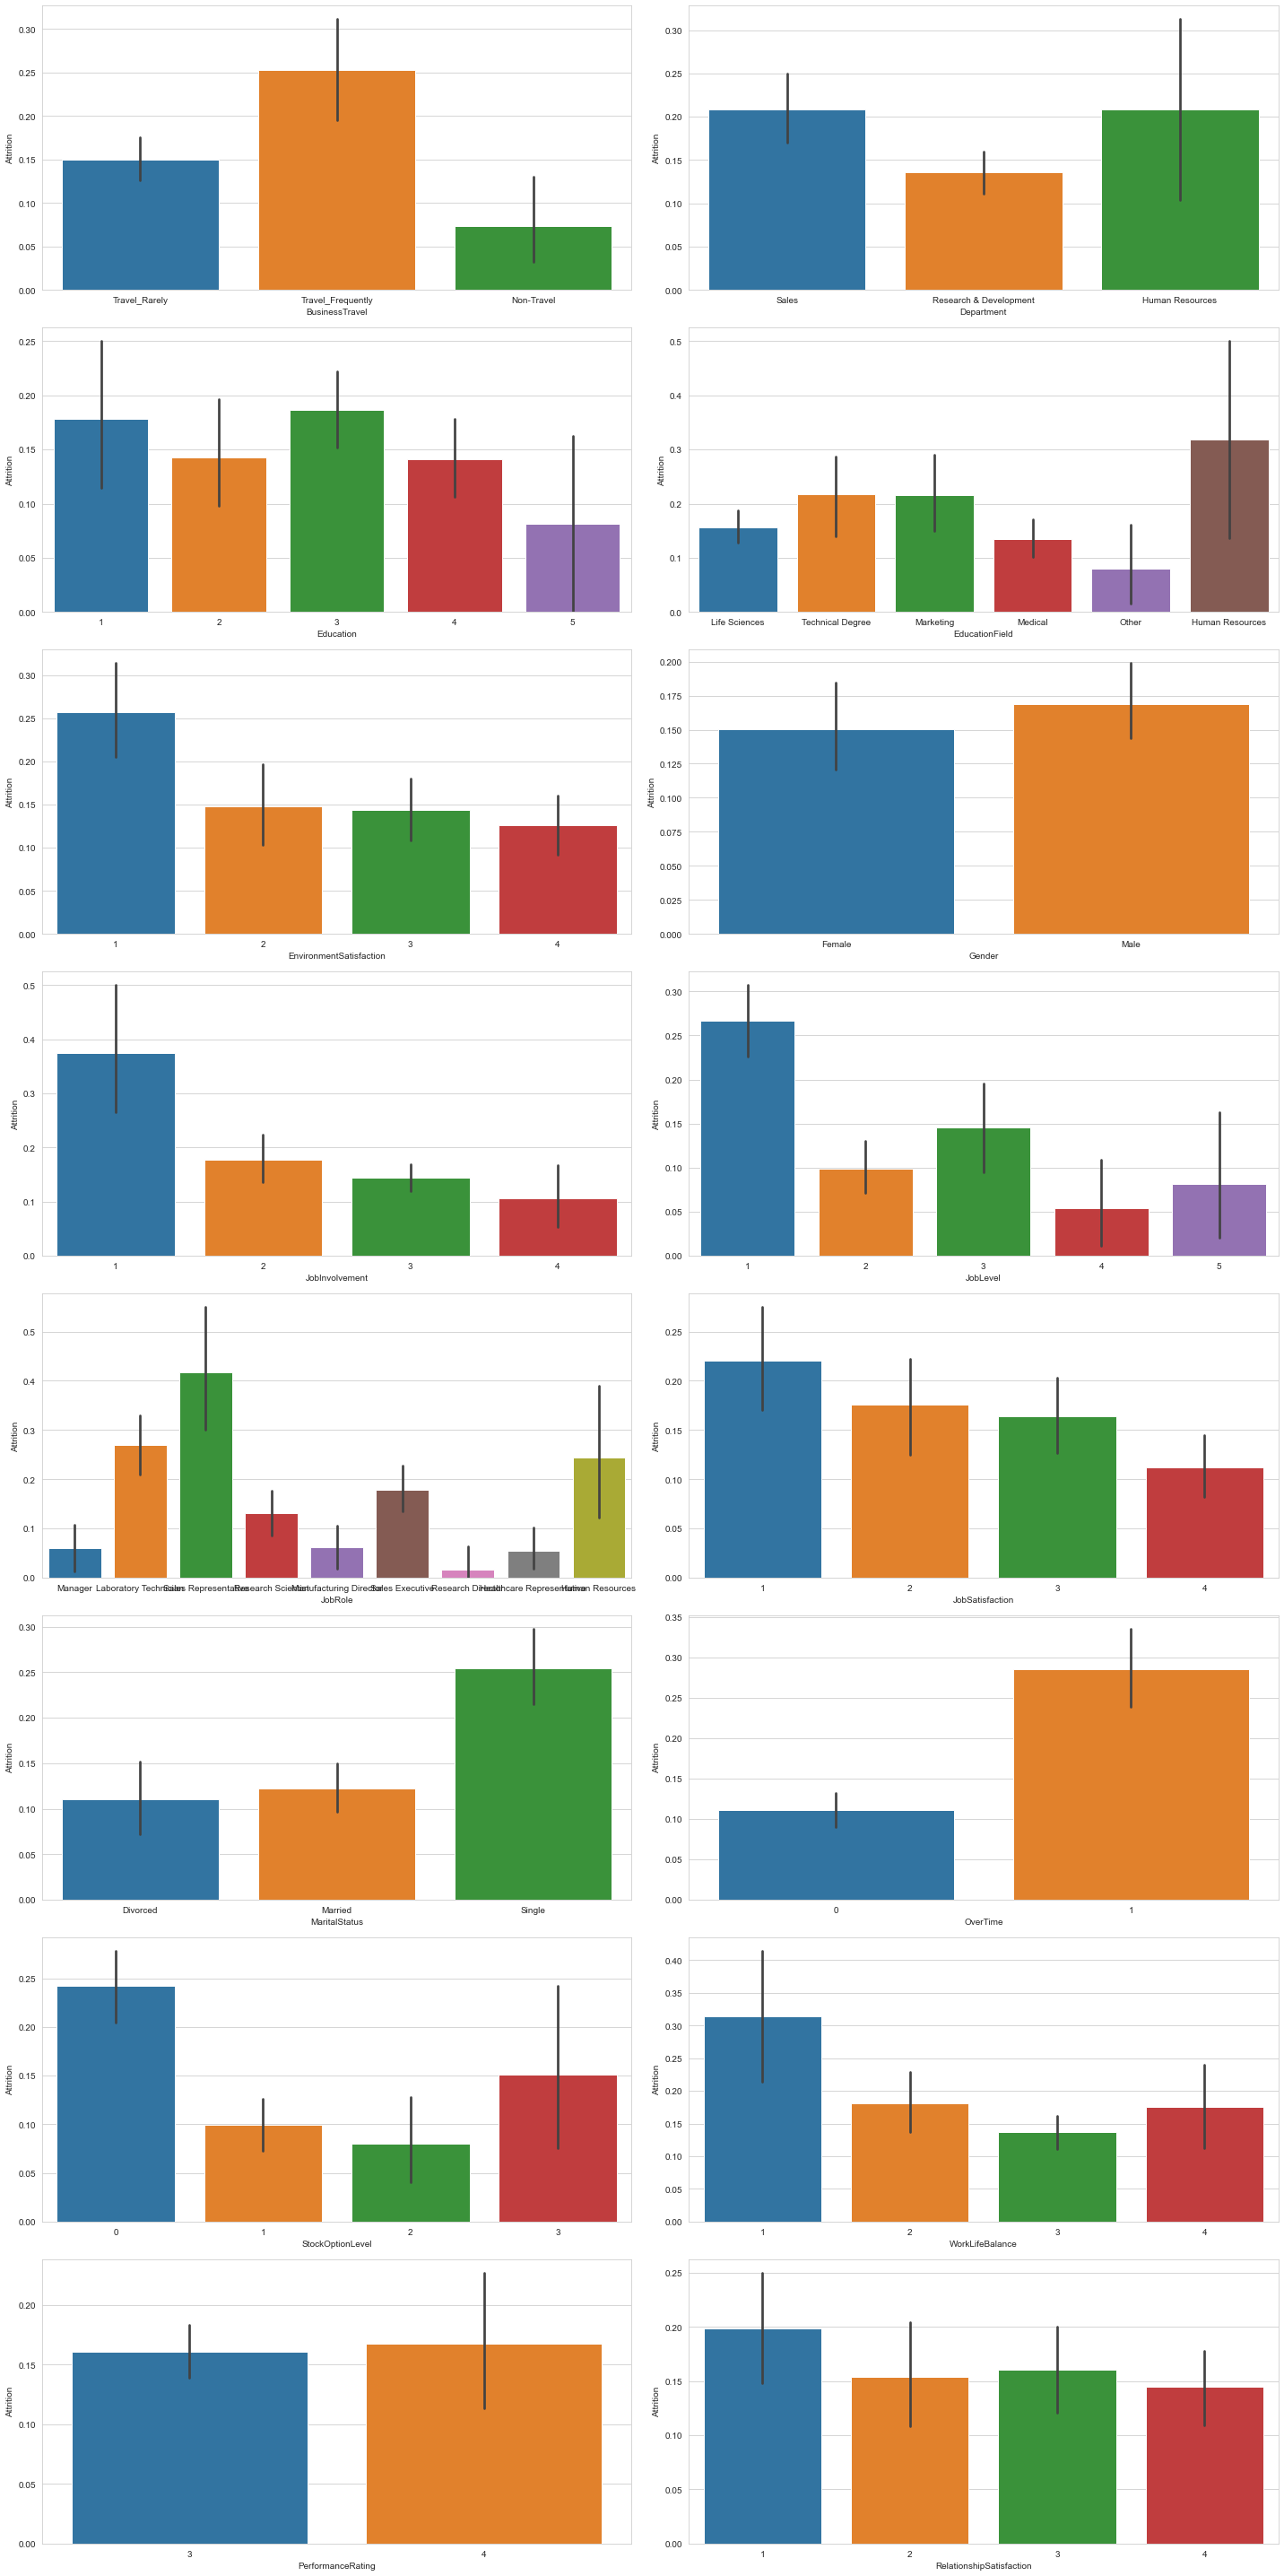

In [15]:
plt.figure(figsize=[20,40],tight_layout=True)
sns.set_style('whitegrid')
for i in range(len(cat_columns)):
    plt.subplot(8,2,i+1)
    sns.barplot(x=cat_columns[i],y='Attrition',data=employee_df_train)

From the charts, we can draw the following conclusions:

- 'BusinessTravel' impacts the attrition. Frequent travelers present more than 20% percent, which almost triples non-travel and doubles travel-rarely.
- 'Department': There is disparity between departments.  Sales and HR have more rotation (around 20% attrition) while Reserach and Development have less.
- 'Education'(1'Below College',2'College',3 'Bachelor',4 'Master',5 'Doctor'): Seems like those employees with below college education level have higher attrition. On the opposite side, the higher level of education (doctor) presents less attrition.
- 'EducationFied': Life Sciences, Medical and Other present half of the attrition than HR and Technical Degree.
- 'EnvironemntSatisfaction (1 'Low', 2 'Medium',3 'High',4 'Very High'): Clearly, having low level of environment satisfaction impacts the attrition rate. The difference between Medium, High and Very High is not that pronounced. It seems that once certain level of environemnt satisfaction is reached, making improvements does not make too much difference.
- 'Gender:  Attrition is slighty higher in males than females.
- 'JobInvolvement' (1 'Low',2 'Medium',3 'High',4 'Very High'): The job involvement is related to the attrition. Attition it's higher for low level of job involvement and decreases gradually when the involvement increases.
- 'JobLevel': AS expected, there is more attrition in the lower level and less attrition in the top levels.
- 'JobRole': Higher attrition is for sales representatives and second one for Human Resources and Laboratory Technician. In the Department feature we also found that Sales and HR deparments are the ones with more attrition.
- 'JobSatisfaction' (1 'Low',2 'Medium',3 'High',4 'Very High'). As expected, the lower the level of job satisfaction the higher the attrition.
- 'MaritalStatus': Single employees present more attrition. This was expected since commonly married (and divorced) have families and seek more stability.
- 'OverTime': No surprise here. Employees that work overtime have a rate of attrition around four times higher.
- 'WorkLifeBalance' (1'Bad',2 'Good',3 'Better',4 'Best').  Employees with work-life balance rated as poor tend to leave. There is no much difference between having a good, better or best rate work life balance, though.
- 'PerformanceRating' ( 1 'Low',2 'Good',3 'Excellent',4 'Outstanding): There are not Low (1) and Good (2) performance rated employees in the dataset. Between Excellent and outsanting employees, there is no much difference.
- 'RelationshipSatisfaction': Values are 1 'Low',2 'Medium',3 'High',4 'Very High'. Similar behaviour than job satisfaction.  The lower the level the higher the attrition.

Overall, there are not many surprises and we have confirmed most of our the initial supositions.


#### 2.2.2 Numerical features

In [16]:
#For visualization purposes we split the dataset between employess who left and employees who are still in the company.
current_employee=employee_df_train[employee_df_train['Attrition']==0]
ex_employee=employee_df_train[employee_df_train['Attrition']==1]

Ex-employees
              Age
mean    33.126316
median  31.000000
Current employees
              Age
mean    37.744422
median  36.000000


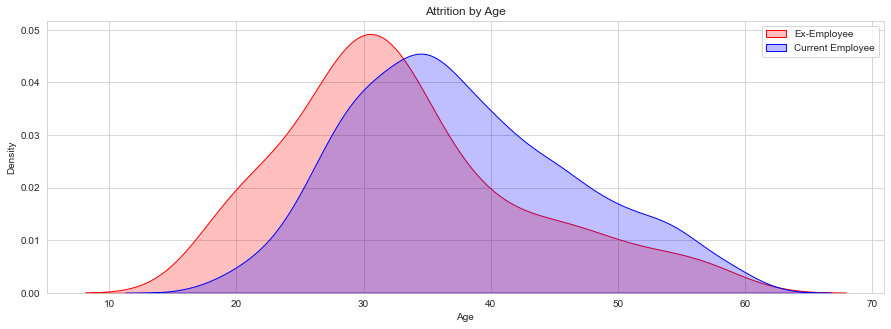

In [17]:
#Attrition by age
plt.figure(figsize=(15,5))
sns.kdeplot(ex_employee['Age'],label='Ex-Employee',shade=True, color='r')
sns.kdeplot(current_employee['Age'],label='Current Employee',shade=True, color='b')
plt.legend(loc="upper right")
plt.title('Attrition by Age')
print('Ex-employees')
print(ex_employee.agg({'Age':['mean','median']}))
print('Current employees')
print(current_employee.agg({'Age':['mean','median']}))


Younger employees tend to leave more. At the early 30s the attrition rate gets even at around 35 years employees tend to stay more in the company than to leave. The conclusion is that the attrition rate tends to be reduced with the age. Mean age of employees who leave and who stay  is 33 and ≈38, respectively.

Ex-employees
        DistanceFromHome
mean           10.973684
median          9.000000
Current employees
        DistanceFromHome
mean            9.046653
median          7.000000


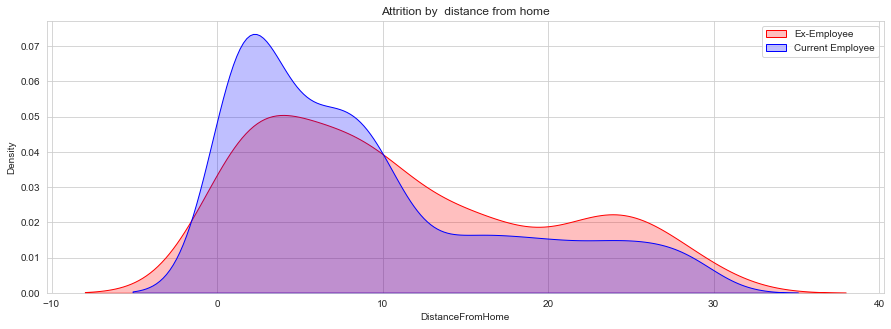

In [18]:
#Attrition by distance from home
plt.figure(figsize=(15,5))
sns.kdeplot(ex_employee['DistanceFromHome'],label='Ex-Employee',shade=True, color='r')
sns.kdeplot(current_employee['DistanceFromHome'],label='Current Employee',shade=True, color='b')
plt.legend(loc="upper right")
plt.title('Attrition by  distance from home')
print('Ex-employees')
print(ex_employee.agg({'DistanceFromHome':['mean','median']}))
print('Current employees')
print(current_employee.agg({'DistanceFromHome':['mean','median']}))

Distance impact the attrition rate. Employees who live up to 10 miles from the office present a lower rate of attrition. For longer distances the proportion of employees that leave increases. Clearly emmployees that are really close to the office have a plus to stay. The average and median distance values for employees who left are 2 miles higher than for the employees who stay (mean: 11 vs 9.0, median  9 vs7.00)

Ex-employees
        MonthlyIncome
mean      4843.878947
median    3373.000000
Current employees
        MonthlyIncome
mean      6871.638945
median    5237.500000


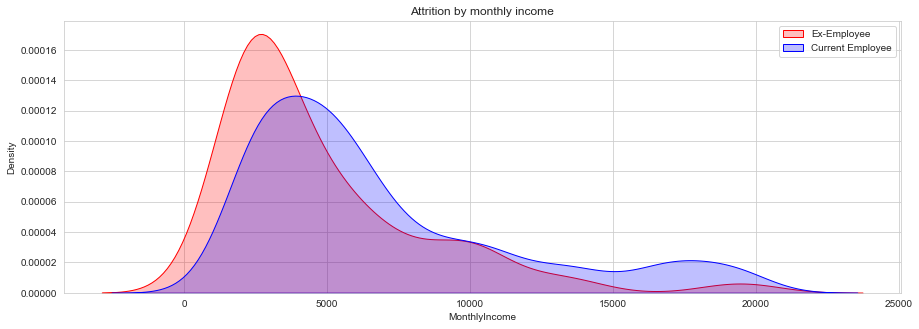

In [19]:
#Attrition by monthly income
plt.figure(figsize=(15,5))
sns.kdeplot(ex_employee['MonthlyIncome'],label='Ex-Employee',shade=True, color='r')
sns.kdeplot(current_employee['MonthlyIncome'],label='Current Employee',shade=True, color='b')
plt.legend(loc="upper right")
plt.title('Attrition by monthly income')
print('Ex-employees')
print(ex_employee.agg({'MonthlyIncome':['mean','median']}))
print('Current employees')
print(current_employee.agg({'MonthlyIncome':['mean','median']}))

Up to a monthly income of around 4000, clearly lower monthly income employees attrition rate is higher. Mean monthly income of ex-employees is 4844 and for employees who stayed is 6871.

Ex-employees
        NumCompaniesWorked
mean              2.968421
median            1.000000
Current employees
        NumCompaniesWorked
mean              2.639959
median            2.000000


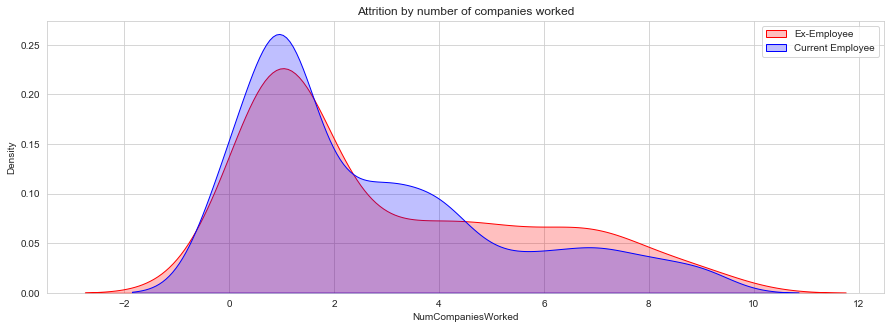

In [20]:
#Attrition by number of companies worked
plt.figure(figsize=(15,5))
sns.kdeplot(ex_employee['NumCompaniesWorked'],label='Ex-Employee',shade=True, color='r')
sns.kdeplot(current_employee['NumCompaniesWorked'],label='Current Employee',shade=True, color='b')
plt.title('Attrition by number of companies worked')
plt.legend(loc="upper right")
print('Ex-employees')
print(ex_employee.agg({'NumCompaniesWorked':['mean','median']}))
print('Current employees')
print(current_employee.agg({'NumCompaniesWorked':['mean','median']}))

There is no big difference in the distributions. Employees that have worked for 2 companies or less slightly tend to stay and employees who have worked for 5 ot more companies slightly have a higher rate of attrition. This feature does not present a high impact in the attrition.

Ex-employees
        PercentSalaryHike
mean            15.163158
median          14.000000
Current employees
        PercentSalaryHike
mean            15.254564
median          14.000000


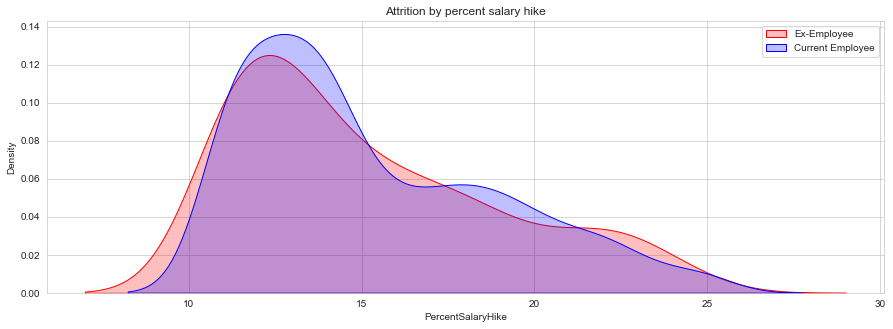

In [21]:
#Attrition by percent salary hike
plt.figure(figsize=(15,5))
sns.kdeplot(ex_employee['PercentSalaryHike'],label='Ex-Employee',shade=True, color='r')
sns.kdeplot(current_employee['PercentSalaryHike'],label='Current Employee',shade=True, color='b')
plt.title('Attrition by percent salary hike')
plt.legend(loc="upper right")
print('Ex-employees')
print(ex_employee.agg({'PercentSalaryHike':['mean','median']}))
print('Current employees')
print(current_employee.agg({'PercentSalaryHike':['mean','median']}))

Distributions are very similar.The means are similar and de median equal. Just in the lower percentage (around 11% and less of salary hike), the probability of leaving is a little bit higher. For  percentages above 11% there is not much difference.

Ex-employees
        TotalWorkingYears
mean             8.057895
median           7.000000
Current employees
        TotalWorkingYears
mean            12.002028
median          10.000000


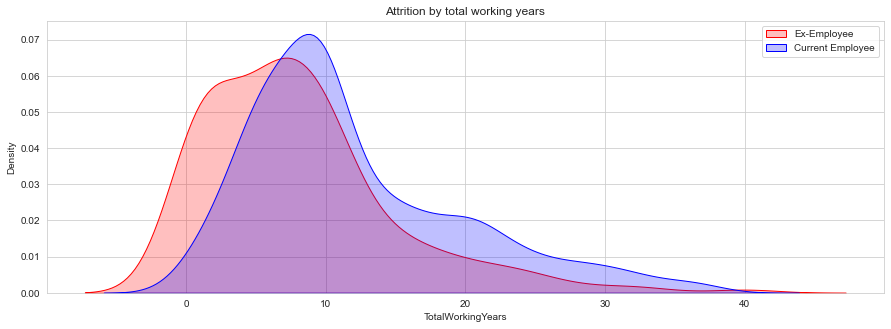

In [22]:
#Attrition by total working years
plt.figure(figsize=(15,5))
sns.kdeplot(ex_employee['TotalWorkingYears'],label='Ex-Employee',shade=True, color='r')
sns.kdeplot(current_employee['TotalWorkingYears'],label='Current Employee',shade=True, color='b')
plt.title('Attrition by total working years')
plt.legend(loc="upper right")
print('Ex-employees')
print(ex_employee.agg({'TotalWorkingYears':['mean','median']}))
print('Current employees')
print(current_employee.agg({'TotalWorkingYears':['mean','median']}))

The attrition probability is higher in employees with less working years. When employess have accumualted around 9 years, the attrition is reduced and the probability of staying in the company increases. Mean of total working years for ex-employees is 8, while for current employees is 12 years.

Ex-employees
        TrainingTimesLastYear
mean                 2.647368
median               2.000000
Current employees
        TrainingTimesLastYear
mean                 2.781947
median               3.000000


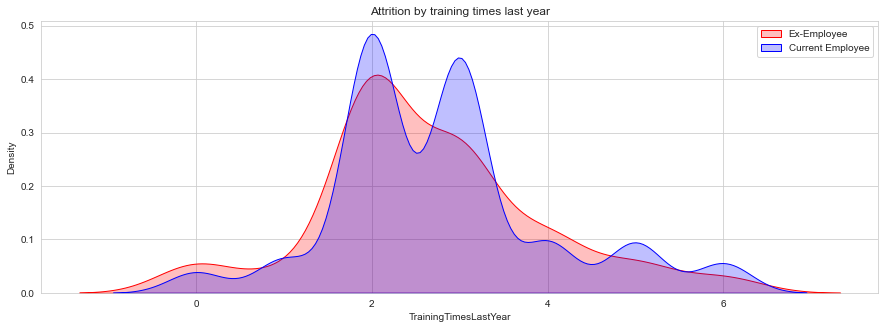

In [23]:
#Attrition by training times last year
plt.figure(figsize=(15,5))
sns.kdeplot(ex_employee['TrainingTimesLastYear'],label='Ex-Employee',shade=True, color='r')
sns.kdeplot(current_employee['TrainingTimesLastYear'],label='Current Employee',shade=True, color='b')
plt.title('Attrition by training times last year')
plt.legend(loc="upper right")
print('Ex-employees')
print(ex_employee.agg({'TrainingTimesLastYear':['mean','median']}))
print('Current employees')
print(current_employee.agg({'TrainingTimesLastYear':['mean','median']}))

Receiving training seems to increase only slightly the probaility of staying in the company.

Ex-employees
        YearsAtCompany
mean               4.9
median             3.0
Current employees
        YearsAtCompany
mean          7.464503
median        6.000000


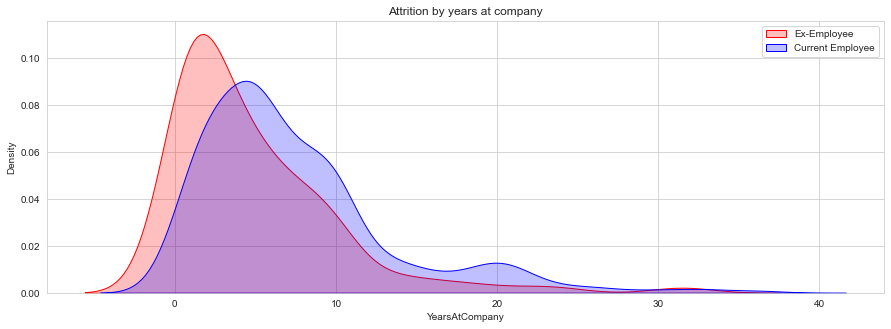

In [24]:
#Attrition by years at company
plt.figure(figsize=(15,5))
sns.kdeplot(ex_employee['YearsAtCompany'],label='Ex-Employee',shade=True, color='r')
sns.kdeplot(current_employee['YearsAtCompany'],label='Current Employee',shade=True, color='b')
plt.title('Attrition by years at company')
plt.legend(loc="upper right")
print('Ex-employees')
print(ex_employee.agg({'YearsAtCompany':['mean','median']}))
print('Current employees')
print(current_employee.agg({'YearsAtCompany':['mean','median']}))

 The longer the employees stay in the company, the lower the chances of attrition. The peak of attrition is reached for employees with between two and three years at the company. Employees who reach between three and four years have more probabilities of staying. Average tenure of employees who left is 4.9 vs 7.5 of the employees who stay.

Ex-employees
        YearsInCurrentRole
mean              2.873684
median            2.000000
Current employees
        YearsInCurrentRole
mean              4.492901
median            3.000000


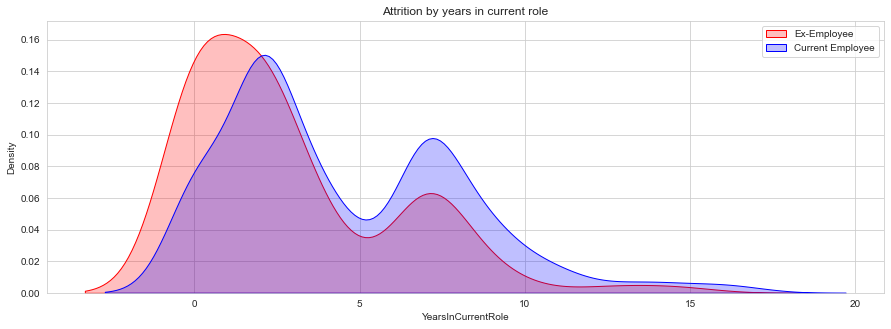

In [25]:
#Attrition by years in current role
plt.figure(figsize=(15,5))
sns.kdeplot(ex_employee['YearsInCurrentRole'],label='Ex-Employee',shade=True, color='r')
sns.kdeplot(current_employee['YearsInCurrentRole'],label='Current Employee',shade=True, color='b')
plt.title('Attrition by years in current role')
plt.legend(loc="upper right")
print('Ex-employees')
print(ex_employee.agg({'YearsInCurrentRole':['mean','median']}))
print('Current employees')
print(current_employee.agg({'YearsInCurrentRole':['mean','median']}))

Similar pattern than years at company. Employees with longer years in their roles tend to stay in the company.

Ex-employees
        YearsSinceLastPromotion
mean                   1.868421
median                 1.000000
Current employees
        YearsSinceLastPromotion
mean                   2.243408
median                 1.000000


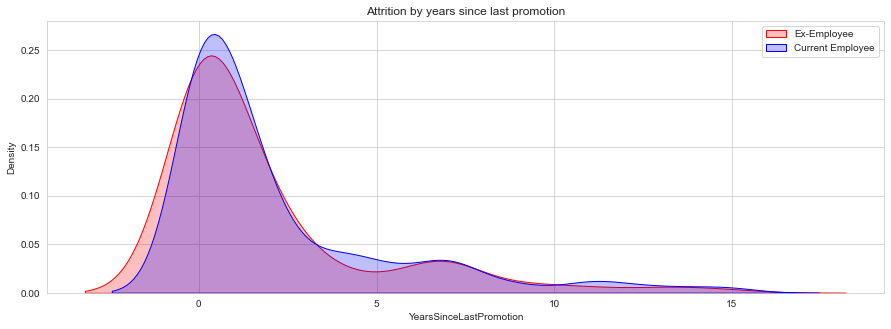

In [26]:
#Attrition by years since last promotion
plt.figure(figsize=(15,5))
sns.kdeplot(ex_employee['YearsSinceLastPromotion'],label='Ex-Employee',shade=True, color='r')
sns.kdeplot(current_employee['YearsSinceLastPromotion'],label='Current Employee',shade=True, color='b')
plt.title('Attrition by years since last promotion')
plt.legend(loc="upper right")
print('Ex-employees')
print(ex_employee.agg({'YearsSinceLastPromotion':['mean','median']}))
print('Current employees')
print(current_employee.agg({'YearsSinceLastPromotion':['mean','median']}))

We were expecting to see that those employees with more time passed since their last promotion would have higher rate of attrition. However, there is not big difference in the chart. We also see that in the dataset around 40% (467) of employees have assigned a value of 0 for years since last promotion:

In [27]:
employee_df_train['YearsSinceLastPromotion'].value_counts()

0     467
1     286
2     124
7      62
4      52
3      40
5      35
6      25
11     20
9      14
8      14
15      9
13      9
12      9
14      7
10      3
Name: YearsSinceLastPromotion, dtype: int64

Of course, it could just mean that 40% of employees were promoted in the last year. If it's true, I would like to work for that company, But perhaps seems more reasonable to assume that employees that have never been promoted are assigned a value of 0. In a real scenario we would have to ask HR department for a clarification.

Ex-employees
        YearsWithCurrManager
mean                2.826316
median              2.000000
Current employees
        YearsWithCurrManager
mean                4.460446
median              3.000000


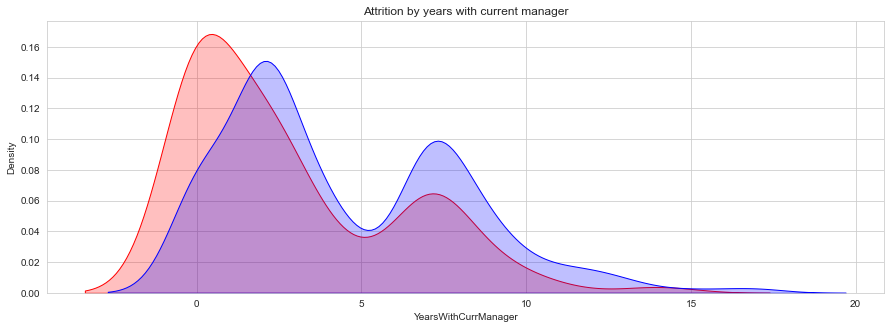

In [28]:
#Attrition by years with current manager
plt.figure(figsize=(15,5))
sns.kdeplot(ex_employee['YearsWithCurrManager'],label='Ex-Employee',shade=True, color='r')
sns.kdeplot(current_employee['YearsWithCurrManager'],label='Current Employee',shade=True, color='b')
plt.title('Attrition by years with current manager')
print('Ex-employees')
print(ex_employee.agg({'YearsWithCurrManager':['mean','median']}))
print('Current employees')
print(current_employee.agg({'YearsWithCurrManager':['mean','median']}))

Employees with more years with the same manager present lower probability of attrition. The distributions are similar to the YearInCurrent role distributions.

##### Conclusion:   
Perhaps we were expecting  more impact on the attrition by some variables such as the number of companies the employee has worked for or the percent of salary hike, but for the most part, we have confirmed most of our initial intuitions.

### 2.3 CORRELATION BETWEEN VARIABLES
We will now explore the relationship between the different variables in the dataset using a correlation matrix.

<AxesSubplot:>

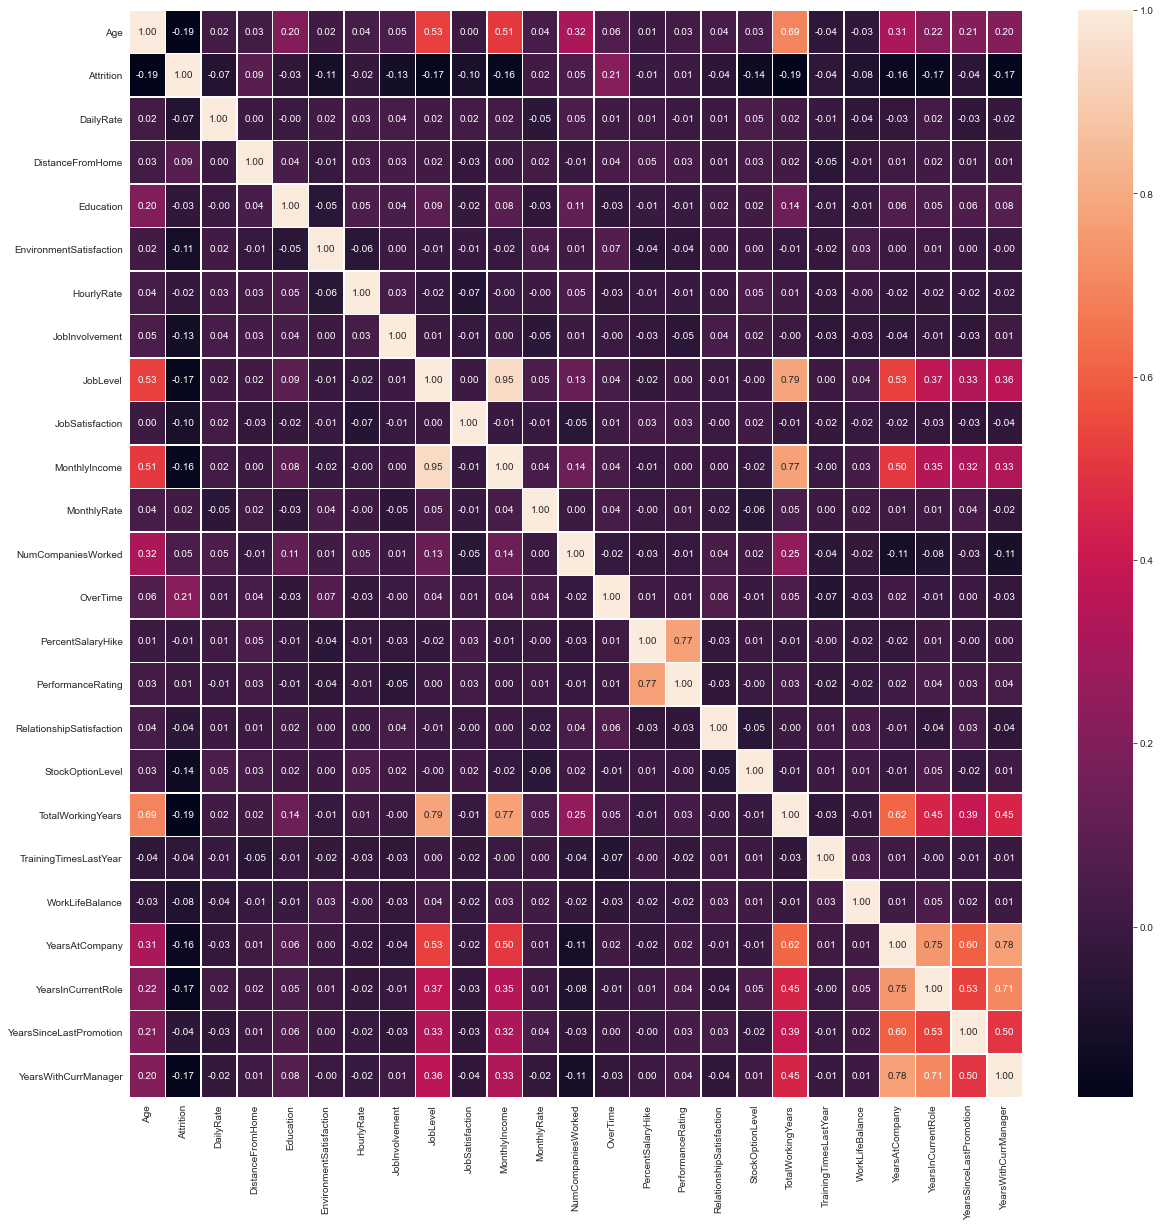

In [29]:
correlations = employee_df_train.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True,linewidths=.5, fmt= '.2f',ax=ax)

- Strong positive correlation between the job level and monthly income and also between job level and total working years of the employee , which is logical. 
- The age of the employee and the total working years there are also correlated.
- Years at current role, years since last promotion, and years with current manager are positively correlated with years at the company.
- Percent salary hike is correlated to the performance rating 

Further exploration can be done with the dataset. For example, plotting gender vs monthly income to see if there is a gender wage gap:

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

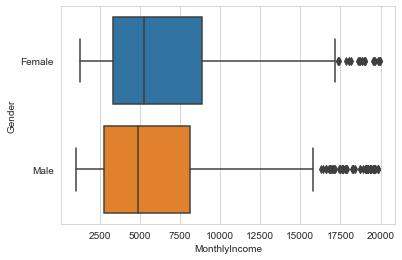

In [30]:
# Gender vs. Monthly Income
sns.boxplot(x='MonthlyIncome',y='Gender',data=employee_df_train)

We see that female mean salary is higher than male.   
And we can also plot the job role vs the monthly income to figure out how the salaries for different roles compare:

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

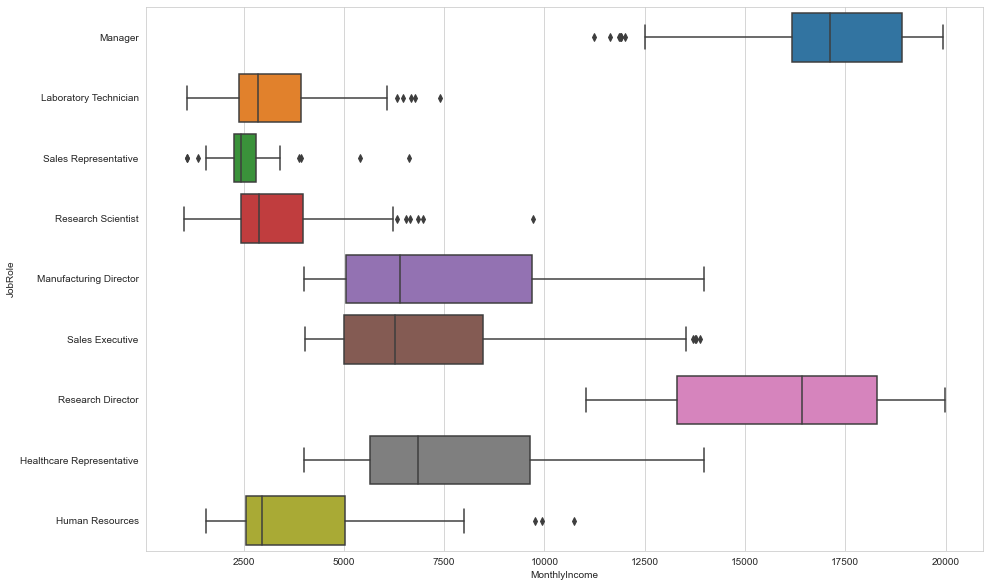

In [31]:
#the JobRole vs. Monthly Income
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome',y='JobRole',data=employee_df_train)

But in the current analysis we are focused in the attrition, so we will move forward to the data preparation step.

## 3. DATA PREPROCESSING AND CLEANING

In [171]:
#Dividing between categorical and numerical features
Train_cat=employee_df_train[employee_df_train.columns[employee_df_train.dtypes==object]]
Train_num=employee_df_train[employee_df_train.columns[employee_df_train.dtypes!=object]]
Train_num=Train_num.drop('Attrition',axis=1)

In [160]:
employee_df_train[employee_df_train.columns[employee_df_train.dtypes!=object]]

Age  Attrition  DistanceFromHome  Education  EnvironmentSatisfaction  \
1194   47          0                 2          4                        2   
128    22          0                 2          1                        3   
810    46          0                 3          1                        1   
478    25          0                13          1                        2   
491    43          0                 9          5                        4   
...   ...        ...               ...        ...                      ...   
1213   23          1                 7          3                        3   
963    38          0                 2          2                        2   
734    22          0                 8          1                        2   
1315   36          0                 2          4                        4   
1292   39          0                20          3                        3   

      JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
1194               4         4                2          15972   
128                3         1                4           2523   
810                3         4                3          17465   
478                3         1                3           2096   
491                3         2                3           5679   
...              ...       ...              ...            ...   
1213               3         1                4           2275   
963                3         2                1           6893   
734                1         1                1           2451   
1315               3         2                2           6962   
1292               3         2                4           4127   

      NumCompaniesWorked  ...  PerformanceRating  RelationshipSatisfaction  \
1194                   6  ...                  3                         3   
128                    0  ...                  3                         3   
810                    3  ...                  3                         4   
478                    1  ...                  3                         3   
491                    3  ...                  3                         2   
...                  ...  ...                ...                       ...   
1213                   1  ...                  4                         2   
963                    3  ...                  3                         4   
734                    1  ...                  3                         1   
1315                   4  ...                  4                         4   
1292                   2  ...                  3                         4   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1194                 3                 29                      2   
128                  1                  3                      2   
810                  1                 23                      3   
478                  0                  7                      1   
491                  1                 10                      3   
...                ...                ...                    ...   
1213                 1                  3                      2   
963                  1                 11                      3   
734                  1                  4                      3   
1315                 1                 15                      2   
1292                 1                  7                      6   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
1194                3               3                   2   
128                 3               2                   1   
810                 3              12                   9   
478                 3               7                   4   
491                 3               8                   7   
...               ...             ...                 ...   
1213                3               3                   2   
963                 3             

In [161]:
#Using OneHOtEncoding to encode the categorical variables
encoder=OneHotEncoder()
Train_cat_enc=encoder.fit_transform(Train_cat).toarray()
Train_cat_df=pd.DataFrame(Train_cat_enc)
Train_cat_df.columns=encoder.get_feature_names()

In [162]:
#Scaling the numerical features
scaler=MinMaxScaler()
Train_num_df =pd.DataFrame(scaler.fit_transform(Train_num),columns=Train_num.columns)

In [173]:
#Joining back the categorical and numerical features after the tretment.
X_train=pd.concat([Train_cat_df,Train_num_df],axis=1)

In [163]:
y_train=employee_df_train['Attrition'].copy()
#y_train=y_train.reset_index(drop=True)

We repeat the same steps for the test set, except that this time we don't fit the encoder and the scaler

In [164]:
Test_cat=employee_df_test[employee_df_test.columns[employee_df_test.dtypes==object]]
Test_num_=employee_df_test[employee_df_test.columns[employee_df_test.dtypes!=object]]
Test_num=Test_num_.drop('Attrition',axis=1)
Test_cat_enc=encoder.transform(Test_cat).toarray()
Test_cat_df=pd.DataFrame(Test_cat_enc)
Test_cat_df.columns=encoder.get_feature_names()
Test_num_df =pd.DataFrame(scaler.transform(Test_num),columns=Test_num.columns)

X_test=pd.concat([Test_cat_df,Test_num_df],axis=1)
y_test=employee_df_test['Attrition']
#y_test=y_test.reset_index(drop=True)

## 4. MODEL

### 4.1. Logistic Classifier

In [175]:
logreg=LogisticRegression(solver='lbfgs')

In [176]:
scores=cross_val_score(logreg,X_train,y_train,scoring='accuracy',cv=5)

In [177]:
print('Accuracy {:.2f} %'.format(100*scores.mean()))

Accuracy 88.10 %


We have obtained an accuracy of 88.10%. However, we have an imabalnced dataset with almost around 85% of employees that stay (attrition=0) and only 15% of employees that left (attrition=1). That means that just by creating a model that just predicts that all employees stay, we would obtain an accuracy of 85%. Accuracy is not an adequate scoring metric in this situation, so let's take a closer look to the results using the confusion matrix and the classification report.


In [196]:
y_pred=cross_val_predict(logreg, X_train, y_train, cv=5)

<AxesSubplot:>

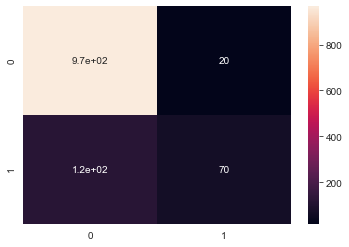

In [197]:
cm=confusion_matrix(y_train,y_pred)
sns.heatmap(cm,annot=True)

In [198]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       986
           1       0.78      0.37      0.50       190

    accuracy                           0.88      1176
   macro avg       0.83      0.67      0.72      1176
weighted avg       0.87      0.88      0.86      1176



Acceptable precission 78% for attrition (class 1) which means that when the model identifies a postitive , in 78% of the cases it will be right (low rate of false positives). However the recall is low, only 37%, which means that the model is only able to identify correctly 37% of the employees that leave (high rate of false negatives). Let's take a look to the precision-recall curve:

In [181]:
y_proba = cross_val_predict(logreg, X_train, y_train, cv=5, method='predict_proba')

In [182]:
precisions,recalls,thresholds=precision_recall_curve(y_train,y_proba[:,1])

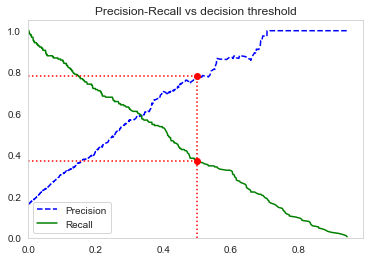

In [183]:
plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
plt.plot(thresholds,recalls[:-1],'g-',label='Recall')
plt.plot([0, 0.5], [0.37, 0.37],"r:")                               
plt.plot([0, 0.5], [0.78, 0.78],"r:")
plt.plot([0.5,0.5], [0, 0.78],"r:")
plt.plot([0.5], [0.37], "ro")                                            
plt.plot([0.5], [0.78], "ro")  
plt.legend()
plt.title('Precision-Recall vs decision threshold')
plt.xlim(xmin=0) 
plt.ylim(ymin=0) 
plt.grid(which='both')
plt.show()

(0.0, 1.0418118466898956)

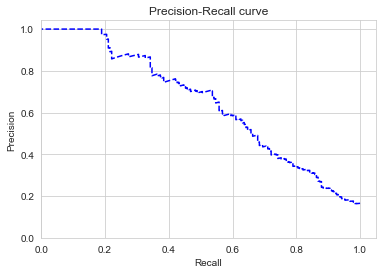

In [184]:
#Precision recall curve
plt.plot(recalls,precisions,'b--')
plt.title('Precision-Recall curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.xlim(xmin=0) 
plt.ylim(ymin=0) 

The Precision-Recall curve ilustrates perfectly the precision/recall trade off. We can see that the precission starts to fall sharply around a 20% recall and if we want to obtain a recall of 50%, the precission will fall to a value of aroung 60%.

We can tweak the precision and recall of the classifier, by modifyig the threshold of 0.5 used to decide the class (attrition in this case). For example, let's see what happens if we set a threshold of 0.4 and a threshold of 0.2:

In [185]:
y_pred_04=(y_proba[:,1]>0.4).astype(int)
y_pred_02=(y_proba[:,1]>0.2).astype(int)

In [186]:
print(classification_report(y_train,y_pred_04))
print(classification_report(y_train,y_pred_02))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       986
           1       0.71      0.53      0.61       190

    accuracy                           0.89      1176
   macro avg       0.81      0.74      0.77      1176
weighted avg       0.88      0.89      0.88      1176

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       986
           1       0.42      0.72      0.53       190

    accuracy                           0.79      1176
   macro avg       0.68      0.76      0.70      1176
weighted avg       0.85      0.79      0.81      1176



We could ask HR department what is they preference:

- to be more certain that the employees classified as 'leavers' by the model are more likely to leave but accepting that there are many 'leavers' 'leaver' employees  that have not been classified as such( high precision and low recall). In other words, less employers are classified as leavers but higher percentage ot them are true "leavers" (less false positives at the expense of having more false negatives).
- to be more certain that the classifier is not missing employees that are more likely to leave at the expense of not being able to identify which of them are true "leavers" (low precision and high recall). In other words, more employees are classified as 'leavers' but a higher percentage of them are not true 'leavers' (less false negatives but more false positives)

To try to improve the results, we next will tune the hyperparameters of the classifier by performing a Gridsearch. We will use several scores and refit for both AUC and f1 scores:

In [187]:
#Gridsearch AUC
#Need to create a training set for tuning the model parameters and a validation set to evaluate the tunned model
scoring = {'AUC': 'roc_auc', 'Precision': 'precision', 'Recall':'recall','Accuracy':'accuracy','f1':'f1'}
params = {'solver':['liblinear'],'penalty': ['l1', 'l2', ],'C': [0.001,0.01,0.1,1,10,100]}
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42) 

grid_logreg_auc = GridSearchCV(logreg, params, cv=kf,scoring=scoring,return_train_score='True',refit='AUC')
grid_logreg_auc.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit='AUC', return_train_score='True',
             scoring={'AUC': 'roc_auc', 'Accuracy': 'acc

In [188]:
grid_logreg_auc.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [189]:
y_pred=grid_logreg_auc.predict(X_test)

<AxesSubplot:>

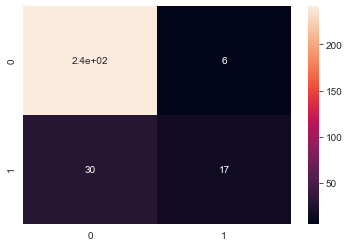

In [192]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [193]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       247
           1       0.74      0.36      0.49        47

    accuracy                           0.88       294
   macro avg       0.81      0.67      0.71       294
weighted avg       0.87      0.88      0.86       294



In [194]:
#GridSearch f1
scoring = {'AUC': 'roc_auc', 'Precision': 'precision', 'Recall':'recall','Accuracy':'accuracy','f1':'f1'}
params = {'solver':['liblinear'],'penalty': ['l1', 'l2', ],'C': [0.001,0.01,0.1,1,10,100]}
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42) 

grid = GridSearchCV(logreg, params, cv=kf,scoring=scoring,return_train_score='True',refit='f1')
grid.fit(X_train,y_train)
y_pred=grid.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       247
           1       0.59      0.36      0.45        47

    accuracy                           0.86       294
   macro avg       0.74      0.66      0.68       294
weighted avg       0.84      0.86      0.84       294



C:\Users\lcast\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Lastly, before moving onto a different classifier, we can explore some ampling techniques. In particular, we will try Randon Over Sampling, Synthetic Minority Oversampling Technique (SMOTE) and SMOTE Tomek.

In [199]:
##Random Over Sampling
ros=RandomOverSampler(random_state=2,sampling_strategy='minority')
sm = SMOTE(random_state=2)
##Synthetic Minority Oversampling Technique (SMOTE)
#Combining over- and under-sampling.
#SMOTE Tomek
smt = SMOTETomek(ratio='auto')

In [200]:
ros = RandomOverSampler(random_state=2,sampling_strategy='minority')
steps = [('ros', ros), ('model', logreg)]
pipeline = Pipeline(steps=steps)
y_pred_ros=cross_val_predict(pipeline, X_train, y_train, cv=5)
print(classification_report(y_train,y_pred_ros))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       986
           1       0.37      0.71      0.49       190

    accuracy                           0.76      1176
   macro avg       0.65      0.74      0.66      1176
weighted avg       0.84      0.76      0.78      1176



In [201]:
sm = SMOTE(random_state=2)
steps = [('SMOTE', sm), ('model', logreg)]
pipeline = Pipeline(steps=steps)
y_pred_sm=cross_val_predict(pipeline, X_train, y_train, cv=5)
print(classification_report(y_train,y_pred_sm))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       986
           1       0.39      0.73      0.51       190

    accuracy                           0.77      1176
   macro avg       0.66      0.75      0.68      1176
weighted avg       0.85      0.77      0.80      1176



In [202]:
sm = SMOTETomek(ratio='auto')
steps = [('SMOTETomek', smt), ('model', logreg)]
pipeline = Pipeline(steps=steps)
y_pred_smt=cross_val_predict(pipeline, X_train, y_train, cv=5)
print(classification_report(y_train,y_pred_smt))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       986
           1       0.39      0.71      0.50       190

    accuracy                           0.77      1176
   macro avg       0.66      0.75      0.68      1176
weighted avg       0.85      0.77      0.79      1176



C:\Users\lcast\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


By oversampling, we are able to increase the recall of the minority class. However, the precision is significantly penalized 

### 4.2. Random Forest

In [203]:
RFC=RandomForestClassifier(n_estimators=100)
scores=cross_val_score(RFC,X_train,y_train,scoring='accuracy',cv=5)
print('Accuracy {:.2f} %'.format(100*scores.mean()))

Accuracy 85.97 %


<AxesSubplot:>

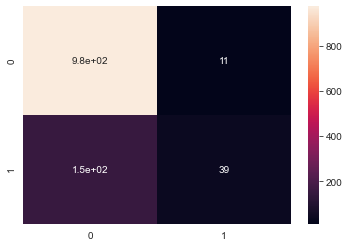

In [204]:
y_pred=cross_val_predict(RFC, X_train, y_train, cv=5)
cm=confusion_matrix(y_train,y_pred)
sns.heatmap(cm,annot=True)

In [143]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       986
           1       0.77      0.19      0.31       190

    accuracy                           0.86      1176
   macro avg       0.82      0.59      0.62      1176
weighted avg       0.85      0.86      0.82      1176



The RF results are worse than the results of the logistic regressor classifier. Let's see if we can improve the model by adjusting the hyperparameters. Same way than before, we refit for AUC and for F1:

C:\Users\lcast\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<AxesSubplot:>

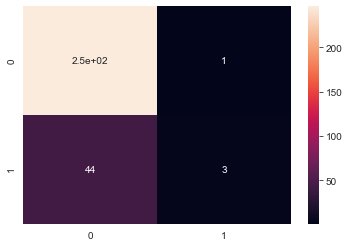

In [205]:
scoring = {'AUC': 'roc_auc', 'Precision': 'precision', 'Recall':'recall','Accuracy':'accuracy','f1':'f1'}
params = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20)),'max_features' : list(range(1,4,1))}
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42) 

grid_rfc_auc = GridSearchCV(RFC, params, cv=kf,scoring=scoring,return_train_score='True',refit='AUC')
grid_rfc_auc.fit(X_train,y_train)

y_pred=grid_rfc_auc.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [206]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       0.75      0.06      0.12        47

    accuracy                           0.85       294
   macro avg       0.80      0.53      0.52       294
weighted avg       0.83      0.85      0.79       294



C:\Users\lcast\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<AxesSubplot:>

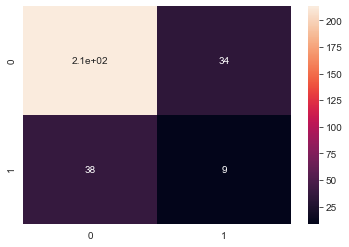

In [208]:
scoring = {'AUC': 'roc_auc', 'Precision': 'precision', 'Recall':'recall','Accuracy':'accuracy','f1':'f1'}
params = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20)),'max_features' : list(range(1,4,1))}
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42) 

grid_rfc_f1 = GridSearchCV(RFC, params, cv=kf,scoring=scoring,return_train_score='True',refit='f1')
grid_rfc_f1.fit(X_train,y_train)

y_pred=grid_rfc_f1.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [210]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       247
           1       0.21      0.19      0.20        47

    accuracy                           0.76       294
   macro avg       0.53      0.53      0.53       294
weighted avg       0.75      0.76      0.75       294



No improvement.The results are behind the ones obtained with the logistic regression classifier. 
We can take a look to the features that have more impact in the attrition:

Text(0.5, 1.0, 'Feature Importance-RFC')

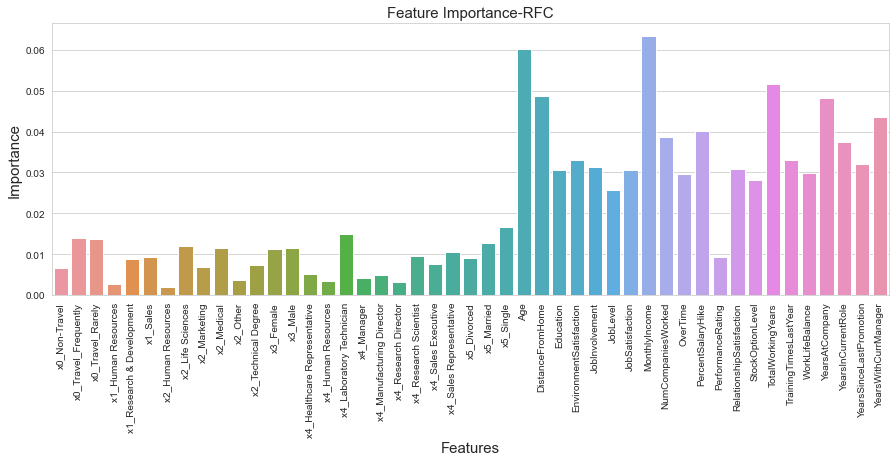

In [212]:
Feature_Importance=grid_rfc_auc.best_estimator_.feature_importances_ 
plt.figure(figsize=(15,5))
plt.xticks(rotation='90')
sns.barplot(x=X_train.columns, y=Feature_Importance)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Importance', fontsize=15)
plt.title('Feature Importance-RFC', fontsize=15)

In [214]:
Feature_Importance_df=pd.DataFrame(Feature_Importance,index=X_train.columns)
Feature_Importance_df.sort_values(0,ascending=False).head(10)

0
MonthlyIncome            0.063366
Age                      0.060110
TotalWorkingYears        0.051726
DistanceFromHome         0.048802
YearsAtCompany           0.048223
YearsWithCurrManager     0.043503
PercentSalaryHike        0.040043
NumCompaniesWorked       0.038716
YearsInCurrentRole       0.037560
EnvironmentSatisfaction  0.033122

### 4.3 Neural Network

We will create a sequential neural network of four layers.


In [225]:
model=tf.keras.models.Sequential()

In [226]:
model.add(tf.keras.layers.Dense(units=500,activation='relu',input_shape=(47,)))
model.add(tf.keras.layers.Dense(units=500,activation='relu'))
model.add(tf.keras.layers.Dense(units=500,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid')) #since it's classification we use sigmoid in the output

In [227]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 500)               24000     
_________________________________________________________________
dense_29 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_30 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 501       
Total params: 525,501
Trainable params: 525,501
Non-trainable params: 0
_________________________________________________________________


In [228]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [229]:
epochs_history=model.fit(X_train,y_train,epochs=100,batch_size=50)

Train on 1176 samples
Epoch 1/100
1176/1176 [==============================] - 1s 593us/sample - loss: 0.4249 - accuracy: 0.8155
Epoch 2/100
1176/1176 [==============================] - 0s 90us/sample - loss: 0.3464 - accuracy: 0.8707
Epoch 3/100
1176/1176 [==============================] - 0s 93us/sample - loss: 0.2940 - accuracy: 0.8886
Epoch 4/100
1176/1176 [==============================] - 0s 100us/sample - loss: 0.2629 - accuracy: 0.8980
Epoch 5/100
1176/1176 [==============================] - 0s 79us/sample - loss: 0.2372 - accuracy: 0.9184
Epoch 6/100
1176/1176 [==============================] - 0s 81us/sample - loss: 0.2037 - accuracy: 0.9252s - loss: 0.2123 - accuracy: 0.92
Epoch 7/100
1176/1176 [==============================] - 0s 92us/sample - loss: 0.1788 - accuracy: 0.9362
Epoch 8/100
1176/1176 [==============================] - 0s 82us/sample - loss: 0.1520 - accuracy: 0.9456
Epoch 9/100
1176/1176 [==============================] - 0s 82us/sample - loss: 0.1136 - accura

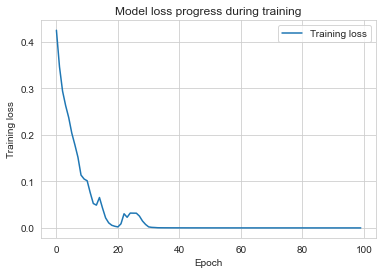

In [230]:
#Plotting the model loss during the training epochs.
plt.plot(epochs_history.history['loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss'])

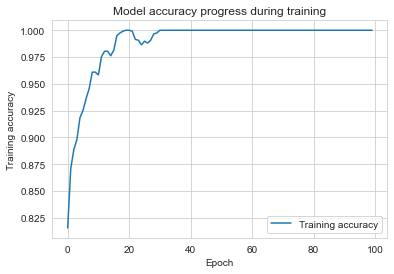

In [231]:
#Plotting the model loss during the training epochs.
plt.plot(epochs_history.history['accuracy'])
plt.title('Model accuracy progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend(['Training accuracy'])

Around 30 epochs there is not to much improvement, so to optimize we can reduce the number of epochs from 100 to 30. Let see how the confussion matrix looks:

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       247
           1       0.53      0.34      0.42        47

    accuracy                           0.85       294
   macro avg       0.71      0.64      0.66       294
weighted avg       0.83      0.85      0.83       294



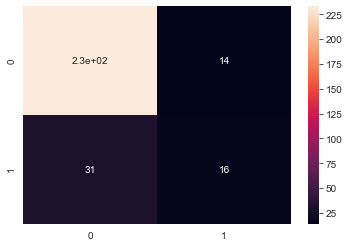

In [232]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

No improvement with regards the linear classifier. We can try to weight up the minority class:

In [233]:
# Giving the class 1 (attrition yes) 15 more weigh than class1 
weights={0:1,1:15}
epochs_history=model.fit(X_train,y_train,epochs=100,batch_size=50,class_weight=weights)

  ...
    to  
  ['...']
Train on 1176 samples
Epoch 1/100
1176/1176 [==============================] - 0s 389us/sample - loss: 5.7040e-05 - accuracy: 1.0000
Epoch 2/100
1176/1176 [==============================] - 0s 103us/sample - loss: 3.4414e-05 - accuracy: 1.0000
Epoch 3/100
1176/1176 [==============================] - 0s 111us/sample - loss: 2.7000e-05 - accuracy: 1.0000 - loss: 2.9477e-05 - accuracy: 1.
Epoch 4/100
1176/1176 [==============================] - 0s 104us/sample - loss: 2.2407e-05 - accuracy: 1.0000
Epoch 5/100
1176/1176 [==============================] - 0s 98us/sample - loss: 1.9325e-05 - accuracy: 1.0000
Epoch 6/100
1176/1176 [==============================] - 0s 92us/sample - loss: 1.7238e-05 - accuracy: 1.0000
Epoch 7/100
1176/1176 [==============================] - 0s 95us/sample - loss: 1.5966e-05 - accuracy: 1.0000
Epoch 8/100
1176/1176 [==============================] - 0s 92us/sample - loss: 1.4294e-05 - accuracy: 1.0000
Epoch 9/100
1176/1176 [============

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       247
           1       0.50      0.36      0.42        47

    accuracy                           0.84       294
   macro avg       0.69      0.65      0.66       294
weighted avg       0.82      0.84      0.83       294



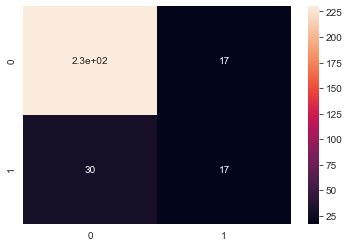

In [234]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

Worse results than without weighting (bot lower recall and precission)

##  Conclusions & Recommendations

- Top variables that influence the attrition are MonthlyIncome, Age, Total Working Years, Distance From Home, Years at the company, Percent Salary Hike, Years with current Manager, number of companies worked, years in current role and job satisfaction. We can suggest HR to focus in this variables, for example:

    -  Monthly Income: offer a competitive salary based on industry benchmarks.
    -  Distance from home: when possible allow working from home. Also provide commuter disccount programs.
    -  Percent Salary Hike: implement regular salary hikes tied to annual performance.
    -  Number of companies worked: use this variable during the hiring processes as an input.
    -  Age/Total Working Years/Years at the company/Years at the current role: employees with less time have a higher risk of attrition. HR could identify these employees and put in place programms/mesures to retain them.
    - Overtime: internal campaing to reduce the overtime. Compensate overtime hours
    
    
- Further EDA can be done, such for example analyzing is the monthly income affects to all departments the same, to identify more concrete scenarios where the attrition is higher.
    
- Three classifier models were explored: linear regression, Random Forest Classifier and a Neural Work. The best results were obtained with the linear regression, although the results are far from perfect and the rate of correct prediction of the attrition is low.  By adjusting the model decission boundary, we can modify the precision and recall to provide HR whith the model that better suits their needs.

- There is room to improve by adjusting the algorithms or trying different ones. Also some feature enfineering could help. But it's also possible that attrition is just that something happens: in a competitive market with opportunities available people just leaves. In that sense, it would be helpful to have the attrition information of other comparable companies to use it as a reference.